In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd



In [4]:
red_social=ldata("data/as-22july06.gml")
G=nx.read_gml("data/as-22july06.gml")


In [6]:
nx.number_of_edges(G)

In [9]:
nx.number_of_nodes(G)

22963

In [10]:
Nodos=[]
for n in G.nodes():
    Nodos.append(n)

In [12]:
K=[]
for n in Nodos:
    K.append(nx.degree(G,n))

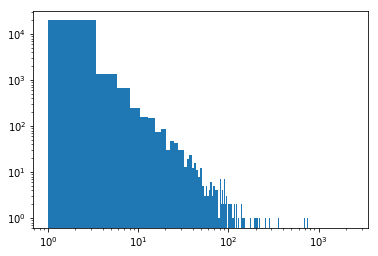

In [24]:
plt.hist(K,bins=1000)
plt.yscale("log")
plt.xscale("log")
plt.show()